In [102]:
import pandas as pd 
import math
import numpy as np
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt #画图
import pylab as pl






row_data = pd.read_csv('dataa/reading_scroll_features.csv')

#remove user 111 and session that is too long
row_data = row_data[row_data['relative_time'] < 2000]
row_data = row_data[(row_data['reading_duration'] > 2)]
data = row_data[row_data['user_id'] != 111].copy()

data['max_offset'] = data['max_offset'].astype('int')
data['min_offset'] = data['min_offset'].astype('int')
data['offset_difference'] = data['offset_difference'].astype('int')
data['relative_time'] = data['relative_time'].astype('int')

# print(data.head())
# print(data.shape)
data.head()
data.shape





(7317, 9)

In [103]:
#find out the max offset and divided that into 3 sections based on 30%, 40% and 30%
grouped_data = data.groupby(['reading_session','article_id'])
    

In [104]:
ratio_article = {}
for group in grouped_data:
    #define the position for each session

    article_id = str(group[0][1])
    reading_session = str(group[0][0])
    reading_SA = article_id +" "+ reading_session
    
    
    time_span_begin = 0
    time_span_middle = 0
    time_span_end = 0
    offset_max = group[1]['max_offset'].max()
    #print(offset_max)#这里我们有一个article的一个maxoffst
    time_max = group[1]['relative_time'].max()+1
    #print(time_max)# 这里我们还有整个文章的阅读长度
    offset_first = 1300#math.ceil(offset_max*0.3)#offset——first 以前都是beginning 
    offset_second = group[1]['scroll_range'].max()-1300 #math.ceil(offset_max*0.7)#offset_first 到 offset——second 是middle 
    #在那之后是end
    #print(offset_second)
    
    group_sorted = group[1].sort_values('relative_time')
    #这里还是一篇文章， 但是relativetime 被sorted 好拉， 
    prev_relative_time = 0
    time_span_begin = 0
    #用来计算开头的时间
    time_span_middle = 0
    #用来计算中间的时间
    time_span_end = 0
    #用来计算最后的时间
    for index, row in group_sorted.iterrows():
        #get the ending offset in this second
        if row['offset_difference'] >= 0:
            current_start_offset = row['min_offset'] 
        else:
            current_start_offset = row['max_offset']
        
        current_relative_time = row['relative_time']+1
        
        time_span = current_relative_time-prev_relative_time
        if current_start_offset < offset_first:
            time_span_begin += time_span
        #elif current_start_offset >= offset_first and current_start_offset <= offset_second:
        #    time_span_middle += time_span
        elif current_start_offset >= offset_second:
             time_span_end += time_span
        else:
            time_span_middle += time_span
        prev_relative_time = current_relative_time
        
    ratio_article[str(reading_SA)]={}
    ratio_article[str(reading_SA)]['begin'] = time_span_begin/time_max
    ratio_article[str(reading_SA)]['middle'] = time_span_middle/time_max
    ratio_article[str(reading_SA)]['end'] = time_span_end/time_max
    

print(ratio_article)    
#print(ratio_article['36579430'])
#print(ratio_article['44199844'])

{'36723486 009b8175-f1ca-4f76-be13-5673098f2d14': {'begin': 0.15, 'middle': 0.85, 'end': 0.0}, '36726095 009b8175-f1ca-4f76-be13-5673098f2d14': {'begin': 0.10869565217391304, 'middle': 0.8913043478260869, 'end': 0.0}, '36734377 009b8175-f1ca-4f76-be13-5673098f2d14': {'begin': 0.5833333333333334, 'middle': 0.4166666666666667, 'end': 0.0}, '36736571 009b8175-f1ca-4f76-be13-5673098f2d14': {'begin': 0.8333333333333334, 'middle': 0.16666666666666666, 'end': 0.0}, '36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c': {'begin': 0.4772727272727273, 'middle': 0.5227272727272727, 'end': 0.0}, '36702468 06a293bb-c63d-44ca-89bb-b253c3e69b1d': {'begin': 1.0, 'middle': 0.0, 'end': 0.0}, '40608002 079ae5a6-95ec-4baf-b18e-2edc010658bc': {'begin': 0.4, 'middle': 0.6, 'end': 0.0}, '40610167 079ae5a6-95ec-4baf-b18e-2edc010658bc': {'begin': 0.4444444444444444, 'middle': 0.5555555555555556, 'end': 0.0}, '36754206 09e5dbaf-a4b7-4e60-8790-4f2125bf59e3': {'begin': 0.8, 'middle': 0.2, 'end': 0.0}, '36756723 09e5dba

In [105]:
ratio_article = pd.DataFrame.from_dict(ratio_article)
ratio_article1 = ratio_article.T
ratio_article1.T.head()

,36723486 009b8175-f1ca-4f76-be13-5673098f2d14,36726095 009b8175-f1ca-4f76-be13-5673098f2d14,36734377 009b8175-f1ca-4f76-be13-5673098f2d14,36736571 009b8175-f1ca-4f76-be13-5673098f2d14,36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,36702468 06a293bb-c63d-44ca-89bb-b253c3e69b1d,40608002 079ae5a6-95ec-4baf-b18e-2edc010658bc,40610167 079ae5a6-95ec-4baf-b18e-2edc010658bc,36754206 09e5dbaf-a4b7-4e60-8790-4f2125bf59e3,36756723 09e5dbaf-a4b7-4e60-8790-4f2125bf59e3,...,36783521 fe5ffb8d-f70e-4da6-a9f8-40c97c15ce9d,36882292 fe8d7db6-850f-4a8a-92fa-dda04935f86e,36912572 fe8d7db6-850f-4a8a-92fa-dda04935f86e,36912992 fe8d7db6-850f-4a8a-92fa-dda04935f86e,36920665 fe8d7db6-850f-4a8a-92fa-dda04935f86e,43992782 fed87984-63c4-4486-a6d5-2610c192cfad,44017266 fed87984-63c4-4486-a6d5-2610c192cfad,44187718 ff514263-a78c-4702-9b37-718022e7b7f6,44191444 ff514263-a78c-4702-9b37-718022e7b7f6,44192075 ff514263-a78c-4702-9b37-718022e7b7f6
begin,0.15,0.108696,0.583333,0.833333,0.477273,1.0,0.4,0.444444,0.8,1.0,...,0.08,0.846154,0.9,0.302326,0.5625,0.257143,0.388889,0.731707,0.6,0.428571
end,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000
middle,0.85,0.891304,0.416667,0.166667,0.522727,0.0,0.6,0.555556,0.2,0.0,...,0.92,0.153846,0.1,0.697674,0.4375,0.742857,0.611111,0.268293,0.4,0.571429


In [106]:
position_article = {}
for group in grouped_data:
    #define the position for each session
    postion_ratio = 0 
    scroll_range = 0
    max_offset = 0
    postion_ratio = 0
    article_id = str(group[0][1])
    reading_session = str(group[0][0])
    reading_SA = article_id +" "+ reading_session
    max_offset = group[1]['max_offset'].max()
    scroll_range = group[1]['scroll_range'].max()
    position_ratio = max_offset/scroll_range    
   
    position_article[str(reading_SA)] = {}
    position_article[str(reading_SA)]['position_ratio'] = position_ratio


# print(position_article)

In [107]:
position_article = pd.DataFrame.from_dict(position_article)
position_article1 = position_article.T
position_article1.head()

,position_ratio
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,0.663172
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,0.811029
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,0.528821
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,0.756974
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,0.748530


In [108]:
ratio_jump={}
for group in grouped_data:
    #abc = abc + 1
    #print(group)
    jump = 0
    numberOfScoll = 0
    data = group[1]
    article_id = str(group[0][1])
    reading_session = str(group[0][0])
    reading_SA = article_id +" "+ reading_session

#     max_offset = group[1]['max_offset'].max()
#     max_relative = group[1]['relative_time'].max()
    for diff in group[1]['offset_difference']:
        numberOfScoll += 1
        if diff > 400:
            jump += 1
    
    jump_ratio = jump/numberOfScoll
  
    ratio_jump[str(reading_SA)] = {}
    ratio_jump[str(reading_SA)]['jump_ratio'] = jump_ratio



#print(abc)


#print(ratio_article)    
#print(ratio_article['36579430'])
#print(ratio_article['44199844'])

In [109]:
ratio_jump = pd.DataFrame.from_dict(ratio_jump)
ratio_jump1 = ratio_jump.T
ratio_jump1.head()

,jump_ratio
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,0.210526
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,0.500000
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,0.200000
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,0.750000
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,0.130435


In [110]:
reading_time = {}
for group in grouped_data:
    #print(group)
    count = 0
    article_id = str(group[0][1])
    reading_session = str(group[0][0])
    reading_SA = article_id +" "+ reading_session

    max_offset = group[1]['max_offset'].max()
    max_relative = group[1]['relative_time'].max()
    
    for diff in group[1]['offset_difference']:
         if diff > 400:
            count += 1
    
    actual_reading_time = max_relative - count
    reading_time_ratio = int(actual_reading_time)/max_relative
    #print(reading_time_ratio)
    reading_time[str(reading_SA)]={}
    reading_time[str(reading_SA)]['actual_reading_time'] = actual_reading_time
    reading_time[str(reading_SA)]['reading_time_ratio'] = reading_time_ratio

# print(reading_time)


#print(ratio_article)    
#print(ratio_article['36579430'])
#print(ratio_article['44199844'])

In [111]:
reading_time = pd.DataFrame.from_dict(reading_time)
reading_time1 = reading_time.T
reading_time1.head()


,actual_reading_time,reading_time_ratio
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,15.0,0.789474
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,38.0,0.844444
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,79.0,0.951807
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,11.0,0.647059
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,40.0,0.930233


In [112]:
skipped_speed1 = {}
max_ratio = 0
min_ratio = 9999999999
skipped_time = 0
sum_offset_diff = 0
#min_ratio -> min_ratio+(max_ratio-min_ratio)*0.1
count = 0
for group in grouped_data:
    #print(group)
    data = group[1]
    article_id = str(group[0][1])
    reading_session = str(group[0][0])
    reading_SA = article_id +" "+ reading_session
    for diff in data['offset_difference']:
        if diff > 400:
            skipped_time += 1
            sum_offset_diff += diff
    if skipped_time > 0:
        skipped_speed = sum_offset_diff/skipped_time
        
        skipped_speed1[str(reading_SA)]={}
        skipped_speed1[str(reading_SA)]['skipped_speed'] = skipped_speed

In [113]:
skipped_speed1 = pd.DataFrame.from_dict(skipped_speed1)
skipped_speed1.head()
skipped_speed1 = skipped_speed1.T
skipped_speed1.head()
# aaa.index.values

,skipped_speed
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,729.000000
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,885.000000
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,773.200000
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,858.047619
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,905.666667


In [114]:
result = pd.concat([skipped_speed1, reading_time1, ratio_jump1,position_article1,ratio_article1], axis=1, sort=False)
result.head()

,skipped_speed,actual_reading_time,reading_time_ratio,jump_ratio,position_ratio,begin,end,middle
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,729.000000,15.0,0.789474,0.210526,0.663172,0.150000,0.0,0.850000
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,885.000000,38.0,0.844444,0.500000,0.811029,0.108696,0.0,0.891304
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,773.200000,79.0,0.951807,0.200000,0.528821,0.583333,0.0,0.416667
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,858.047619,11.0,0.647059,0.750000,0.756974,0.833333,0.0,0.166667
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,905.666667,40.0,0.930233,0.130435,0.748530,0.477273,0.0,0.522727


In [115]:
ana_data =  result[['actual_reading_time','jump_ratio','position_ratio','middle','skipped_speed']]
ana_data.head()
print(ana_data.shape)

(482, 5)


In [116]:
from sklearn.preprocessing import StandardScaler
features = ['actual_reading_time','jump_ratio','position_ratio','middle','skipped_speed']
# Separating out the features
x = ana_data.loc[:, features].values
print(x)
x = StandardScaler().fit_transform(x)
#transformation here
print(x.shape)
print(x)

[[1.50000000e+01 2.10526316e-01 6.63171691e-01 8.50000000e-01
  7.29000000e+02]
 [3.80000000e+01 5.00000000e-01 8.11029412e-01 8.91304348e-01
  8.85000000e+02]
 [7.90000000e+01 2.00000000e-01 5.28820817e-01 4.16666667e-01
  7.73200000e+02]
 ...
 [3.50000000e+01 2.94117647e-01 5.34953924e-01 2.68292683e-01
  9.09437582e+02]
 [1.10000000e+01 2.14285714e-01 7.45434422e-01 4.00000000e-01
  9.08950820e+02]
 [2.00000000e+00 5.71428571e-01 2.52998379e-01 5.71428571e-01
  9.09270111e+02]]
(482, 5)
[[-0.31211897 -0.27641496  0.46426452  1.33598504 -3.96358629]
 [-0.0681543   1.03092786  1.16250744  1.47032208 -1.27328289]
 [ 0.36673924 -0.3239547  -0.1701937  -0.07337549 -3.20133366]
 ...
 [-0.09997578  0.10110649 -0.14123073 -0.55594265 -0.85184373]
 [-0.35454761 -0.25943648  0.85274183 -0.12758166 -0.8602382 ]
 [-0.45001205  1.35351895 -1.47273687  0.42996756 -0.85473185]]


In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

(482,)
(482,)
(482, 2)


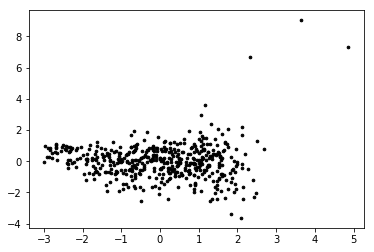

In [118]:
f1 = principalDf['principal component 1'].values
print(f1.shape)
f2= principalDf['principal component 2'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [128]:
#num of clusters 
k = 2
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(x) #search in web
labels = kmeans.predict(x)
print(len(labels))
print(len(x))
print(len(principalDf))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion




482
482
482
[[ 0.95925384 -0.0390505 ]
 [-1.27437105  0.05187868]]


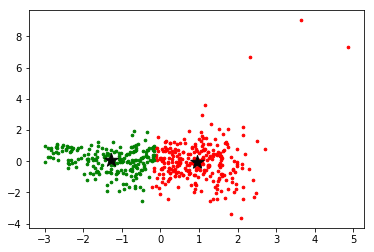

In [129]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

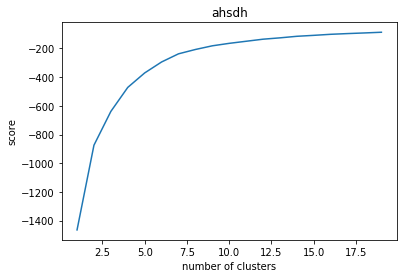

In [121]:
# 一个用来算最优 收敛的 算法 
Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc] 
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('ahsdh')
pl.show()

In [94]:
ana_data['label'] = labels
ana_data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,actual_reading_time,jump_ratio,position_ratio,middle,skipped_speed,label
36723486 009b8175-f1ca-4f76-be13-5673098f2d14,15.0,0.210526,0.663172,0.450000,729.000000,3
36726095 009b8175-f1ca-4f76-be13-5673098f2d14,38.0,0.500000,0.811029,0.826087,885.000000,3
36734377 009b8175-f1ca-4f76-be13-5673098f2d14,79.0,0.200000,0.528821,0.702381,773.200000,3
36736571 009b8175-f1ca-4f76-be13-5673098f2d14,11.0,0.750000,0.756974,0.166667,858.047619,0
36677028 02a76bc1-0d5b-43da-ad5c-f52c8472502c,40.0,0.130435,0.748530,0.204545,905.666667,3
36702468 06a293bb-c63d-44ca-89bb-b253c3e69b1d,3.0,0.000000,0.092346,0.250000,905.666667,1
40608002 079ae5a6-95ec-4baf-b18e-2edc010658bc,6.0,0.300000,0.663234,0.600000,896.222222,3
40610167 079ae5a6-95ec-4baf-b18e-2edc010658bc,23.0,0.176471,0.786482,0.037037,1153.300000,0
36754206 09e5dbaf-a4b7-4e60-8790-4f2125bf59e3,1.0,0.600000,0.639376,0.400000,1093.666667,0
36756723 09e5dbaf-a4b7-4e60-8790-4f2125bf59e3,33.0,0.000000,0.589800,0.352941,1093.666667,4
